<a href="https://colab.research.google.com/github/rizqillahzahra/Data-Project/blob/master/Customer_Churn_Prediction_using_3_Different_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
Seberapa akurat prediksi customer yang akan churn dengan semua variabel (numerik dan kategorikal) dikalkulasi dengan menggunakan 3 algoritma yang berbeda

# Business Objective
3 model untuk prediksi customer yang akan churn

# **Exploratory Data Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path
	
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')

In [ ]:
print(df_load.head())

   UpdatedAt   customerID  gender SeniorCitizen Partner  tenure PhoneService  \
0     202006  45759018157  Female            No     Yes       1           No   
1     202006  45315483266    Male            No     Yes      60          Yes   
2     202006  45236961615    Male            No      No       5          Yes   
3     202006  45929827382  Female            No     Yes      72          Yes   
4     202006  45305082233  Female            No     Yes      56          Yes   

  StreamingTV InternetService PaperlessBilling  MonthlyCharges  TotalCharges  \
0          No             Yes              Yes           29.85         29.85   
1          No              No              Yes           20.50       1198.80   
2         Yes             Yes               No          104.10        541.90   
3         Yes             Yes              Yes          115.50       8312.75   
4         Yes             Yes               No           81.25       4620.40   

  Churn  
0    No  
1    No  
2   Yes 

In [ ]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         6950 non-null   int64  
 1   customerID        6950 non-null   int64  
 2   gender            6950 non-null   object 
 3   SeniorCitizen     6950 non-null   object 
 4   Partner           6950 non-null   object 
 5   tenure            6950 non-null   int64  
 6   PhoneService      6950 non-null   object 
 7   StreamingTV       6950 non-null   object 
 8   InternetService   6950 non-null   object 
 9   PaperlessBilling  6950 non-null   object 
 10  MonthlyCharges    6950 non-null   float64
 11  TotalCharges      6950 non-null   float64
 12  Churn             6950 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 706.0+ KB


In [ ]:
df_load.isna().sum()

UpdatedAt           0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
tenure              0
PhoneService        0
StreamingTV         0
InternetService     0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df_load.duplicated().sum()

0

### **Prosentase Churn**

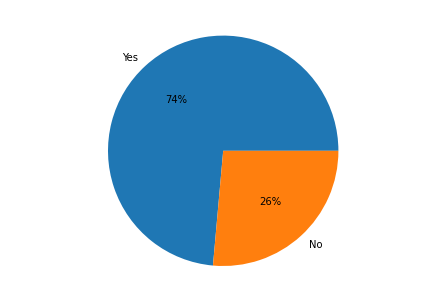

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

### **EDA Numeric Variables**

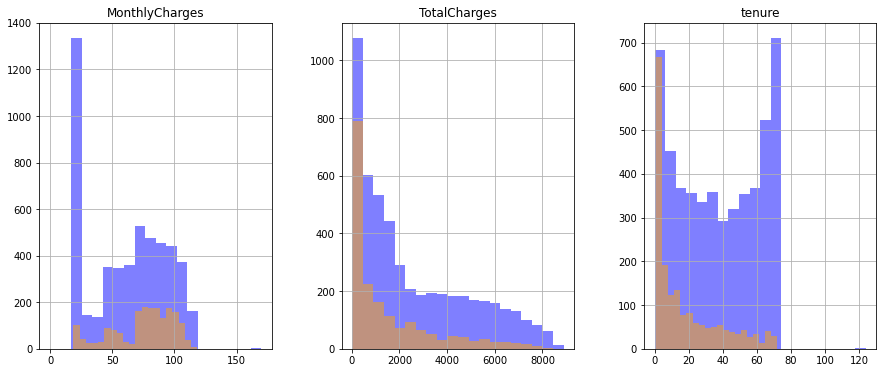

In [ ]:
numerical_features =  ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

### **EDA Categorical Variables**

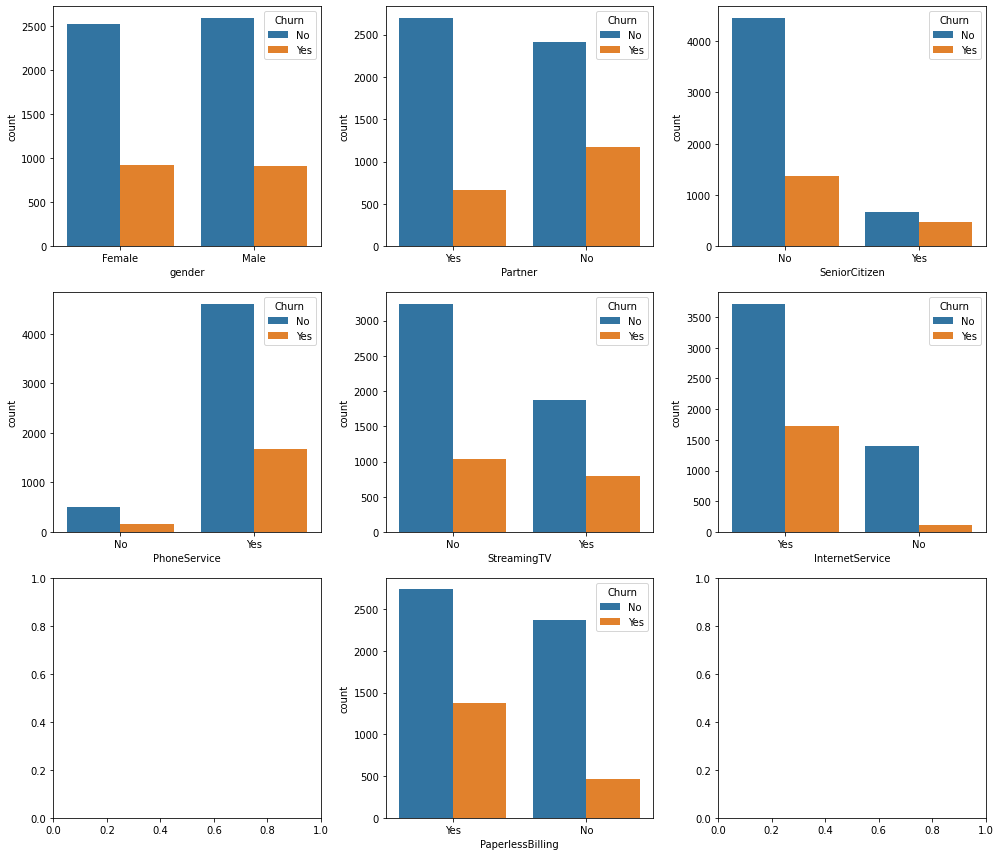

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

# **Cleaning Data**

In [ ]:
cleaned_df = df_load.drop(['customerID', 'UpdatedAt'],axis=1)
print(cleaned_df.head())

   gender SeniorCitizen Partner  tenure PhoneService StreamingTV  \
0  Female            No     Yes       1           No          No   
1    Male            No     Yes      60          Yes          No   
2    Male            No      No       5          Yes         Yes   
3  Female            No     Yes      72          Yes         Yes   
4  Female            No     Yes      56          Yes         Yes   

  InternetService PaperlessBilling  MonthlyCharges  TotalCharges Churn  
0             Yes              Yes           29.85         29.85    No  
1              No              Yes           20.50       1198.80    No  
2             Yes               No          104.10        541.90   Yes  
3             Yes              Yes          115.50       8312.75    No  
4             Yes               No           81.25       4620.40    No  


# **Overview Data Correlation**

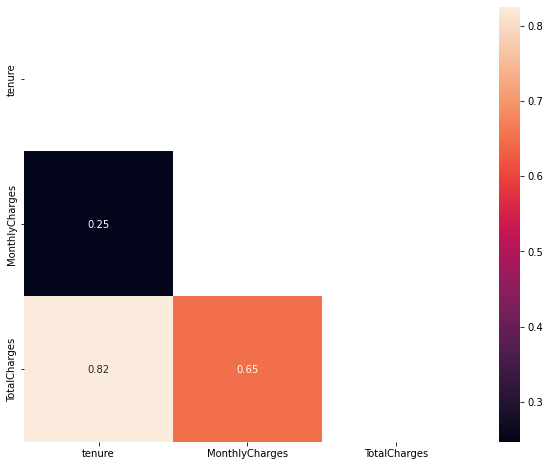

In [ ]:
mask = np.triu(np.ones_like(cleaned_df.corr(), dtype=np.bool))

# Create heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cleaned_df.corr(), annot=True, mask=mask)

### **Encoding Data**

In [ ]:
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number: continue
    # Perform encoding for each non-numeric column
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
print(cleaned_df.describe())

            gender  SeniorCitizen      Partner       tenure  PhoneService  \
count  6950.000000    6950.000000  6950.000000  6950.000000   6950.000000   
mean      0.504317       0.162302     0.483309    32.415827      0.903741   
std       0.500017       0.368754     0.499757    24.561336      0.294967   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     9.000000      1.000000   
50%       1.000000       0.000000     0.000000    29.000000      1.000000   
75%       1.000000       0.000000     1.000000    55.000000      1.000000   
max       1.000000       1.000000     1.000000    73.000000      1.000000   

       StreamingTV  InternetService  PaperlessBilling  MonthlyCharges  \
count  6950.000000      6950.000000       6950.000000     6950.000000   
mean      0.384317         0.783453          0.591942       64.992201   
std       0.486468         0.411921          0.491509       30.032040   
min       0.00

### **Splitting Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
# Predictor dan target
X = cleaned_df.drop('Churn', axis = 1) 
y = cleaned_df['Churn']
# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (5560, 10) , sedangkan Jumlah baris dan kolom dari y_train adalah: (5560,)
Prosentase Churn di data Training adalah:
0    0.735971
1    0.264029
Name: Churn, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (1390, 10) , sedangkan Jumlah baris dan kolom dari y_test adalah: (1390,)
Prosentase Churn di data Testing adalah:
0    0.735252
1    0.264748
Name: Churn, dtype: float64


# **Building Model 1: Logistic Regression**

In [ ]:
# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data  
logreg = logreg.fit(x_train,y_train)
#Training Model: Predict 
y_pred = logreg.predict(x_test)

#Evaluate Model Performance
print('Training Accuracy :', logreg.score(x_train, y_train))  
print('Testing Accuracy :', logreg.score(x_test, y_test))  

# confusion matrix
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
print(cm)

# classification report  
print('\nClassification report')  
cr = classification_report(y_test, y_pred)  
print(cr)

Training Accuracy : 0.791726618705036
Testing Accuracy : 0.7964028776978417

Confusion matrix
[[928  94]
 [189 179]]

Classification report
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1022
           1       0.66      0.49      0.56       368

    accuracy                           0.80      1390
   macro avg       0.74      0.70      0.71      1390
weighted avg       0.78      0.80      0.79      1390



In [ ]:
df_test_set = x_test
df_test_set = df_test_set.join(y_test)
df_test_set['CHURN PREDICTIONS'] = y_pred
df_test_set.sample(5)

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,CHURN PREDICTIONS
6319,1,0,0,1,1,0,1,0,47.95,47.95,0,0
1605,1,0,1,45,1,1,1,1,109.75,4900.65,0,0
1058,0,0,0,17,1,0,0,0,19.70,340.35,0,0
3461,0,0,1,53,1,1,1,1,93.45,4872.20,0,0
370,1,0,0,3,1,1,1,1,65.25,209.90,0,1


# **Building Model 2: Random Forest Classifier**

In [ ]:
# Call the classifier
rdf_model = RandomForestClassifier()
# Fit the classifier to the training data  
rdf_model = rdf_model.fit(x_train,y_train)
#Training Model: Predict 
y_pred = rdf_model.predict(x_test)

#Evaluate Model Performance
print('Training Accuracy :', rdf_model.score(x_train, y_train))  
print('Testing Accuracy :', rdf_model.score(x_test, y_test))  

# confusion matrix
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
print(cm)

# classification report  
print('\nClassification report')  
cr = classification_report(y_test, y_pred)  
print(cr)

Training Accuracy : 0.9964028776978417
Testing Accuracy : 0.7661870503597122

Confusion matrix
[[901 121]
 [204 164]]

Classification report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1022
           1       0.58      0.45      0.50       368

    accuracy                           0.77      1390
   macro avg       0.70      0.66      0.67      1390
weighted avg       0.75      0.77      0.76      1390



In [ ]:
df_test_set = x_test
df_test_set = df_test_set.join(y_test)
df_test_set['CHURN PREDICTIONS'] = y_pred
df_test_set.sample(5)

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,CHURN PREDICTIONS
5881,1,0,1,24,1,0,0,0,20.25,439.75,0,0
3401,0,0,0,70,1,1,1,0,98.90,6838.60,0,0
4232,0,1,1,58,1,1,1,1,97.80,5458.80,0,0
871,1,0,1,71,1,1,1,0,109.30,7782.85,0,0
3256,0,0,0,9,1,1,1,1,90.80,809.75,1,1


# **Building Model 3: Gradient Boosting Classifier**

In [ ]:
# Call the classifier
gbt_model = GradientBoostingClassifier()
# Fit the classifier to the training data  
gbt_model = gbt_model.fit(x_train,y_train)
#Training Model: Predict 
y_pred = gbt_model.predict(x_test)

#Evaluate Model Performance
print('Training Accuracy :', gbt_model.score(x_train, y_train))  
print('Testing Accuracy :', gbt_model.score(x_test, y_test))  

# confusion matrix
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
print(cm)

# classification report  
print('\nClassification report')  
cr = classification_report(y_test, y_pred)  
print(cr)

Training Accuracy : 0.8140287769784172
Testing Accuracy : 0.8086330935251799

Confusion matrix
[[944  78]
 [188 180]]

Classification report
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1022
           1       0.70      0.49      0.58       368

    accuracy                           0.81      1390
   macro avg       0.77      0.71      0.73      1390
weighted avg       0.80      0.81      0.80      1390



In [ ]:
df_test_set = x_test
df_test_set = df_test_set.join(y_test)
df_test_set['CHURN PREDICTIONS'] = y_pred
df_test_set.sample(5)

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,CHURN PREDICTIONS
4762,0,0,0,8,1,0,1,0,71.15,563.65,1,0
5766,0,0,0,70,1,1,1,1,113.65,7939.25,0,0
144,0,0,1,72,1,1,1,1,84.90,6065.30,0,0
1147,0,1,1,2,1,0,1,0,50.15,115.10,1,1
145,1,0,1,58,1,1,1,1,75.20,4300.80,0,0


# **Choosing The Best Model**

Summary:


*   Logistic Regression: Akurasi training 79% dan akurasi testing 79%
*   Random Forest: Akurasi training 99% dan akurasi testing 79%
*   Gradiant Boost: Akurasi training 81% dan akurasi testing 80%






Berdasarkan pemodelan yang telah dilakukan dengan menggunakan 3 model (Logistic Regression, Random Forest dan Gradiant Boost) maka dapat disimpulkan untuk memprediksi churn dari pelanggan telco dengan menggunakan dataset ini model terbaiknya adalah menggunakan algortima **Logistic Regression**, karena akurasi training sama baiknya dengan akurasi testing.



